# QBio Python Workshop Week 3

## More Numpy and Matplotlib

Prepared and presented by John Russell (johnrussell@g.harvard.edu)

**Outline**

- Recap last week
  - Creating arrays
  - Aggregations
- Broadcasting
- Indexing
  - Single elements
  - Slicing
  - Binary indexing
  - Some advanced indexing


In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#this cell changes some matplotlib defaults to make plots nicer 
import matplotlib as mpl
mpl.rc("font", family='serif')
mpl.rc("figure", figsize=(9,6))
%config InlineBackend.figure_format = 'retina'

## Broadcasting

We have already seen the simplest case of broadcasting.

In [26]:
x = np.arange(5)

In [27]:
6*x +1

array([ 1,  7, 13, 19, 25])

Even though `x` is an array, numpy knows to *broadcast* the multiplication and addition of single numbers over each value of the array. Among other things, this makes your code much more closely resemble mathematical notation. Compare the above numpy code with how we would do this with a list

```python
y = []
for i in range(len(x)):
    y.append(6*x[i]+3)
```

Broadcasting can also work between arrays. The rule is roughly that the arrays must be broadcastable along the *last dimensions* of the larger arrays. Being broadcastable means the two arrays either have the same shape or one of them has shape 1 along their last dimensions.

In [29]:
a = 10*np.arange(12).reshape(4,3)
b1 = np.arange(3)

In [30]:
a + b1

array([[  0,  11,  22],
       [ 30,  41,  52],
       [ 60,  71,  82],
       [ 90, 101, 112]])

In [31]:
print(f"{a.shape=}")
print(f"{b1.shape=}")

a.shape=(4, 3)
b1.shape=(3,)


In [32]:
b2 = np.arange(4)

In [33]:
a+b2 # bad - will not run becuase shapes incompatible

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In [35]:
a+b2[:,None] # works because the shapes are consistent according to numpy broadcasting

array([[  0,  10,  20],
       [ 31,  41,  51],
       [ 62,  72,  82],
       [ 93, 103, 113]])

In [38]:
# shapes of arrays used in the broadcasting example
print(f'{a.shape=}')
print(f'{b2.shape=}') # doesnt work
print(f'{b2[:,None].shape=}') # works - this will make more sense next week
print(f'{np.expand_dims(b2,1).shape=}') # works - same as previous 

a.shape=(4, 3)
b2.shape=(4,)
b2[:,None].shape=(4, 1)
np.expand_dims(b2,1).shape=(4, 1)


#### Convenient argument to aggregations - `keepdims=True`

In [39]:
a

array([[  0,  10,  20],
       [ 30,  40,  50],
       [ 60,  70,  80],
       [ 90, 100, 110]])

In [40]:
a_mean1 = np.mean(a, axis=1)

In [41]:
a_mean1.shape

(4,)

In [42]:
a/a_mean1

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In [43]:
a_mean2 = np.mean(a, axis=1, keepdims=True)

In [44]:
a_mean2.shape

(4, 1)

In [45]:
a/a_mean2

array([[0.        , 1.        , 2.        ],
       [0.75      , 1.        , 1.25      ],
       [0.85714286, 1.        , 1.14285714],
       [0.9       , 1.        , 1.1       ]])

## Aggregations and Broadcasting Exercises

**Question 1:** Softmax

In machine learning we often want to assign a set of probabilities to a data point being in some class. In order to be a consistent set of probabilities they must sum to 1 since we assume that each data point must be in one of the possible classes. For numerical reasons, it is often preferebale to work with a vector of unnormalized "scores" that we convert to probabilities using the `softmax` function defined by

$$\text{softmax}({\bf x})_i = \dfrac{e^{x_i}}{\sum_j e^{x_j}}$$

Write your own softmax function that takes in a 2D numpy array with shape `(N,C)` where N is the number of data points (so each row is a separate entry) and C is the number of classes. Test your function on the synthetic data array provided.

**Note 1:** If you have done some thermodynamics you might recognize the softmax function as the boltzmann distribution where you you would say "energy" rather than "score".

**Note 2:** In real life, you should use one of the many existing implementations of softmax e.g. [`scipy.special.softmax`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.softmax.html). If time permits, you can use the scipy implementation and [`np.allclose`](https://numpy.org/doc/stable/reference/generated/numpy.allclose.html) to check that your implementation is correct.

In [52]:
data = np.random.default_rng().normal(size=(100,15))

In [54]:
def my_softmax(x):
    # Your code here
    return None

## Numpy array indexing

**Basic Indexing and Slicing**

Numpy arrays can be indexed like lists. For a 1D array we can 
- Use square brackets and a number (0 references the first elemnt, -1 references the last and so on) e.g. `np.linspace(0,1,11)[8]`.
- Use a : for slices e.g. `np.arange(6)[1:4]`

Things get more interesting for higher dimensional arrays.
- Indexing a single element will return a sub-array 
- Index multiple dimensions with a single set of brackets e.g. arr[3,4,5]
- Use a : to select an entire dimension
- Combine indexing and slicing along different dimensions

![indexing](https://numpy.org/doc/stable/_images/np_matrix_indexing.png)

**Advanced Indexing**

We can also index numpy arrays using other arrarys. This allows us to specify a set of points and return them in a specific shape.

The returned array always has the same shape as the indexing array.

In [ ]:
arr = np.arange()

In [ ]:
# Using other arrays -- Expand here given 
arr[np.array([1,3]), np.array([2,4])]

In [ ]:
# More use of other arrays - get the diagonal
arr[np.arange(4), np.arange(4)]

**Boolean Indexing**

Boolean indexing allows us to access all the elements of an array that satisfy a certain condition. The first step is to make a boolean array, sometimes called a mask.

In the same way that we can do mathematical operations on whole arrays, we can also do *logical operations* on arrays. The output of logical operations will be boolean arrays, arrays that only contain `True` or `False` elements.

In [56]:
print(arr)
print()
print(arr > 7)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

[[False False False False False]
 [False False False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


In [25]:
evens = arr%2==0

In [26]:
print(arr)
print()
print(evens)# % is the modulo operator, x%y gives the remainder when x is divided by y.

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

[[ True False  True False  True]
 [False  True False  True False]
 [ True False  True False  True]
 [False  True False  True False]]


If we index the array with a boolean array of compatible shape, we can access the elements where the boolean array is `True`.

In [27]:
arr[evens]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

Note that the returned array is 1D since in general, we cannot guarantee that the result will be rectangular.

#### A few handy tricks for indexing with binary arrays

Inversion

In [ ]:
#naively


In [ ]:
#maybe easier

Logical operations: And and Or

In [ ]:
#multiples of three

In [ ]:
#even and multiple of three

In [14]:
#even or multiple of three

You can do a lot with these logical operations, but these three (not, and, or) are the fundamental ones out of which you can compute complex things.

## Indexing Exercises 

### Question 1

This exercise is desinged to review what you learned yesterday and to begin to practice boolean indexing.

The cell below generates two arrays: 
- `x` is the dependent variable which we will use for plotting. It contains 300 uniformly spaced points from [-1,1].
- `y` is a 2-dimensional array that contains the values of 10 different functions of x, each one in its own column

The following cell makes a plot of all 10 different columns of `y`.

In [20]:
x = np.linspace(-1,1, 300)
y = np.load("exercise1_y.npy")

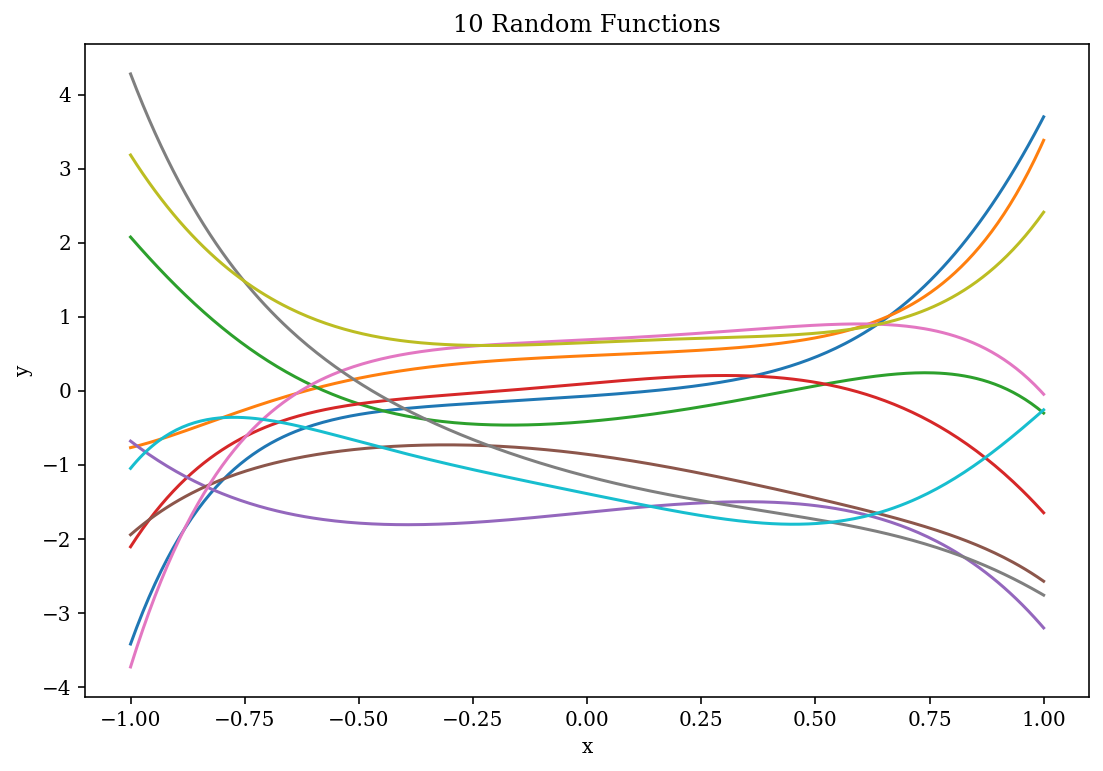

In [22]:
for i in range(10):
    plt.plot(x, y[:,i])
plt.title("10 Random Functions")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Part a.**

Compute the difference between the first and last point of each of the 10 columns of y. Which column has the largest difference and which has the smallest?

Hint: Look at the documentation for [`np.argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) and [`np.argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)

**Part b.**

Make a plot showing the curves with the largest and smallest net differences that you found in part a on the same axes. Include a legend that lists the value of the net difference for each curve.

**Part c.**

Compute average value of y for each of the 10 different functions, in other words, the average of each column. Which column has the largest average and which one has the smallest? 

**Part d.**

Make a plot showing the curves with the largest and smallest average values that you found in part c on the same axes. Include a legend that lists the average value of each curve as well as its index in the original array.

## Question 2 - Estimating $\pi$ again.

**Part a.**
The cell below generates two arrays `X` and `Y` that each contain 1000 random numbers between 0 and 1. Make a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) showing all the points that lie inside the circle $x^2+y^2=1$ in red and all the points that lie outside that circle in blue.

In [43]:
N = int(1e3)
rng = np.random.default_rng()
X = rng.random(N)
Y = rng.random(N)

**Part b**

The area of a 1x1 square is obviously 1 and the area of a quarter circle with radius 1 is $\pi/4$. Count the number of points that lie inside the unit circle and use the fraction of the points inside to estimate $\pi$. What is the relative error with 1000 sample points? Change the value of `N` in the cell above and rerun and calculate the the relative error with $10^6$ and $10^9$ sample points. Recall from last week that the relative error of an estimate is 

$$ \frac{|\text{Estimate}-\text{True}|}{\text{True}} $$

## Random numbers and random walks

Random number generation is a surprisingly tricky thing to do on a computer which we generally think of as highly non-random. Strictly speaking, we will be talking about *pseudo*random number generation since its impossible to genereate truly random numbers. However it is important enough that lots work has gone into doing it well and many of the best implementations live in the `numpy.random` module.

*Note*: The `numpy.random` module was changed significantly in summer of 2019 so what you'll see today is the modern (and higher performace) usage. For compatibility reasons, numpy still supports the old way and you are likely to come across older code which will look slightly different.

The core of the random module is a `Generator` object. The easiest and most likely best way to initialize one is

In [57]:
rng = np.random.default_rng() #rng stands for Random Number Generator

The `Generator` object can then generate numbers from a vast array of different distributions. You can learn about these in a statistics class but I'll show a few examples.

In [ ]:
rng

In [ ]:
#sample normal distribution

In [ ]:
#show every distribution, sample gamma

In [ ]:
#Randomly choose from pets
pets = ['cat', 'dog', 'fish', 'rabbit']

#### Random Walks

Random walks are a *very* powerful and widely used model in basically every area of science. One of the great things about random walks is that they are very easy to simulate and often analytically tractable (the math is much beyond the scope of this bootcamp but happy to discuss in office hours as usual). We'll work on these today since they pull together pretty much all of the numpy tools we have discussed.

Here is the idea: a walker starts at some point and at each time point takes a "random step." There are many ways to define a random step but lets focus on the simplest case in 1 dimension. 
- A walker starts at 0 on the number line.
- The walker flips a coin.
- If the coin comes heads, take a step to the right (+1)
- If the coin comes up tails take a step to the left (-1)
- Repeat this process for many time steps i.e. coin flips.

In [ ]:
steps = rng.choice([-1,1], size=1000)

In [ ]:
position = np.cumsum(steps)

In [ ]:
plt.plot(position)
plt.title("A Random Walk")
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

#### Compiling statistics

Often the idea with simulating random walkers is that we simulate many of them and the calculate statistics as a function of time. Said slightly differently, we often average over the walkers rather than averaging over time. 

In [ ]:
# generate 500 rws
# steps = rng.choice([-1,1], size=(1000,500)) #1000 steps or time points, 500 walkers

In [ ]:
#positions = steps.cumsum(axis=0)

In [ ]:
# plt.plot(positions[:,0])
# plt.title("10 Random Walks")
# plt.xlabel('Time')
# plt.ylabel('Position')
# plt.show()

In [ ]:
positions.shape

In [ ]:
#plot 

Remember that we have 500 walkers and 1000 time steps so the first dimension in this array is time and the second dimension is the walkers.

In [ ]:
#select the trajectories

In [ ]:
# mean = positions.mean(1)
# std = positions.std(1)

In [ ]:
#count them

In [ ]:
# plt.plot(std, label="Std. Dev.")
# plt.plot(mean, label='Mean')
# fit standard deviation
# plt.legend()
# plt.show()

### Random Walks Exercise

*Note* Since we are generating random numbers your individual results may be slightly different. 


#### Part a.

Similate 100 random walkers each taking 1000 steps as above but rather than a "coin flip" to determine the step, have these walkers take a step to the right (+1) with probability 0.65 and a step to the left (-1) with probability 0.35 - this is often called a biased random walk. Make plot showing the trajectories of the walkers which ended up farthest from the origin and closest to the origin.

*Hint* Read the documentation of `rng.choice`

#### Part b.

- Compute the mean and standard deviation of these walkers as a function of time. 
- Plot the mean and standard deviation as a function of time on the same axes. 
- Plot $\sqrt{t}$ as above and plot on the same axes. Does it still seem to describe the standard deiviation as a function of time?
- **Optional** Can you come up with a function that describes the mean as a function of time? Plot this function as well. *Hint* How do you think the average depends on the probability of going right? Does your formula give the correct result from the demo above when $p=0.5$?

#### Part c. 

Rather than just walking up and down the number line, lets see what happens when the walk happens in two dimensions. Simulate 100 walkers each taking 1000 steps in the XY plane. Generate a 2D step by taking 2 independent samples from a standard normal distribution (mean=0, standard deviation=1). Plot 10 walks *in the XY plane*.

#### Part d.

Find the walkers which end up the farthest from the origin and the closest. Plot these two trajectories in the XY plane.

*Hint* Given a point $(x,y)$ how do you compute the distance from the origin? Can you use numpy to compute the distance for all the walkers at all the time points without any loops?

**Optional** Plot the trajectories of all the walkers in black and pass the keyword argument `alpha=0.25` to `plt.plot` which makes the lines somewhat transparent. Then plot the furthest and closest trajectories on the same axes in two different colors of your choice.

#### Part e. 

Plot the trajectories of any walkers who remain in the first quadrant for their entire trajectory (i.e. $x(t)>0$ and $y(t)>0$ for all times $t$). You will probably want to simulate more walkers (~$10^5$) in order to find some who meet this criterion, it happens with probability ~0.05\%.